## Full script for TensorFlow CNN model to recognize snakes w description

##### Step 1: Split the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils

In [2]:
SEED_DATA_DIR = "C:\Build\SnakeImages"
num_of_images = {}

In [3]:
for dir in os.listdir(SEED_DATA_DIR):
    num_of_images[dir] = len(os.listdir(os.path.join(SEED_DATA_DIR, dir )))

print (num_of_images)

{'NoSnake': 17, 'Snake': 16, 'test': 3, 'train': 3, 'validate': 3}


In [4]:
# now we want to create 3 folders: 70% train data, 15% validation data and 15% test data

TRAIN_DIR =  "C:\Build\SnakeImages\\train"
VALIDATE_DIR =  "C:\Build\SnakeImages\\validate"
TEST_DIR =  "C:\Build\SnakeImages\\test"

In [5]:
# create the train folder :
if not os.path.exists(TRAIN_DIR):
    os.mkdir(TRAIN_DIR)

    for dir in os.listdir(SEED_DATA_DIR):
        os.makedirs(TRAIN_DIR + "/" + dir)
        print (TRAIN_DIR + "/" + dir)

        for img in np.random.choice(a=os.listdir(os.path.join(SEED_DATA_DIR,dir)) , size= (math.floor(70/100* num_of_images[dir] )-5) , replace=False ):
            O = os.path.join(SEED_DATA_DIR, dir , img)
            print(O)
            D = os.path.join(TRAIN_DIR, dir)
            print(D)
            shutil.copy(O,D)
            os.remove(O)
else:
    print("Train Folder Exists")

Train Folder Exists


In [6]:
# create the test folder
if not os.path.exists(TEST_DIR):
    os.mkdir(TEST_DIR)

    for dir in os.listdir(SEED_DATA_DIR):
        os.makedirs(TEST_DIR + "/" + dir)
        print (TEST_DIR + "/" + dir)

        for img in np.random.choice(a=os.listdir(os.path.join(SEED_DATA_DIR,dir)) , size= (math.floor(15/100* num_of_images[dir] )-5) , replace=False ):
            O = os.path.join(SEED_DATA_DIR, dir , img)
            print(O)
            D = os.path.join(TEST_DIR, dir)
            print(D)
            shutil.copy(O,D)
            os.remove(O)
else:
    print("Test Folder Exists")

Test Folder Exists


In [7]:
# create the validate folder
if not os.path.exists(VALIDATE_DIR):
    os.mkdir(VALIDATE_DIR)

    for dir in os.listdir(SEED_DATA_DIR):
        os.makedirs(VALIDATE_DIR + "/" + dir)
        print (VALIDATE_DIR + "/" + dir)

        for img in np.random.choice(a=os.listdir(os.path.join(SEED_DATA_DIR,dir)) , size= (math.floor(15/100* num_of_images[dir] )-5) , replace=False ):
            O = os.path.join(SEED_DATA_DIR, dir , img)
            print(O)
            D = os.path.join(VALIDATE_DIR, dir)
            print(D)
            shutil.copy(O,D)
            os.remove(O)
else:
    print("Validate Folder Exists")

Validate Folder Exists


##### Step 2: Build the model!

In [8]:
from matplotlib.pyplot import cla
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing import image
import keras

In [9]:
TRAIN_DIR =  "C:\Build\SnakeImages\\train"
VALIDATE_DIR =  "C:\Build\SnakeImages\\validate"

In [10]:
# build the CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (224,224,3)    ))

model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),  activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3),  activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))

#final layer:
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 256)       2

In [11]:
# create the train data augmentation object
# ==========================================

train_datagen = image.ImageDataGenerator(
    zoom_range=0.2 , shear_range=0.2, rescale=1. / 255 , horizontal_flip=True
)

val_datagen = image.ImageDataGenerator( rescale= 1. / 255)

train_data = train_datagen.flow_from_directory(directory=TRAIN_DIR , target_size=(224,224) , batch_size=32 , class_mode='binary')
val_data = val_datagen.flow_from_directory(directory=VALIDATE_DIR, target_size=(224,224), batch_size=32, class_mode='binary')

Found 973 images belonging to 3 classes.
Found 200 images belonging to 3 classes.


In [12]:
# create model check point for the performence of the model

from keras.callbacks import ModelCheckpoint , EarlyStopping

In [13]:
# lets stop the training if the accuracy is good

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01 , patience=5 , verbose=1 , mode='auto')
mc = ModelCheckpoint(filepath='C:\Build\SnakeImages\MyBestModel.h5', monitor='val_accuracy' ,  verbose=1 , mode='auto' , save_best_only=True)


call_back = [es, mc]

hist = model.fit(x=train_data, epochs=30 , verbose=1, validation_data=val_data, callbacks=call_back)

h = hist.history
print('Keys : ', h.keys() )

Epoch 1/30
31/31 [==============================] - ETA: 0s - loss: 0.6372 - accuracy: 0.6886 
Epoch 1: val_accuracy improved from -inf to 0.76500, saving model to C:\Build\SnakeImages\MyBestModel.h5


C:\Users\olivi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/31 [==============================] - 442s 14s/step - loss: 0.6372 - accuracy: 0.6886 - val_loss: 0.5178 - val_accuracy: 0.7650
Epoch 2/30
31/31 [==============================] - ETA: 0s - loss: 0.4945 - accuracy: 0.7801 
Epoch 2: val_accuracy did not improve from 0.76500
31/31 [==============================] - 425s 14s/step - loss: 0.4945 - accuracy: 0.7801 - val_loss: 0.5105 - val_accuracy: 0.7500
Epoch 3/30
31/31 [==============================] - ETA: 0s - loss: 0.4818 - accuracy: 0.7729 
Epoch 3: val_accuracy improved from 0.76500 to 0.78000, saving model to C:\Build\SnakeImages\MyBestModel.h5
31/31 [==============================] - 443s 14s/step - loss: 0.4818 - accuracy: 0.7729 - val_loss: 0.4685 - val_accuracy: 0.7800
Epoch 4/30
31/31 [==============================] - ETA: 0s - loss: 0.4562 - accuracy: 0.7873 
Epoch 4: val_accuracy improved from 0.78000 to 0.79500, saving model to C:\Build\SnakeImages\MyBestModel.h5
31/31 [==============================] - 601s 19s/step 

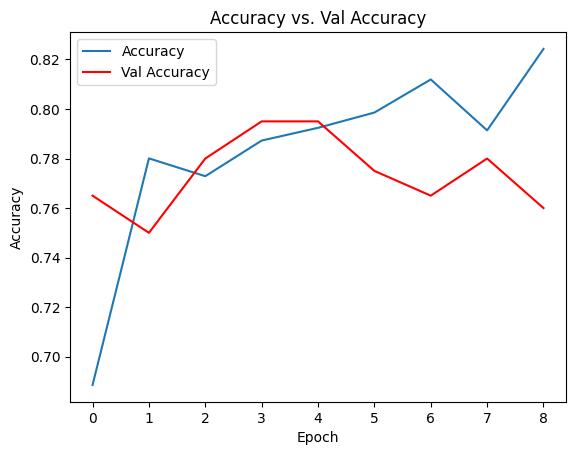

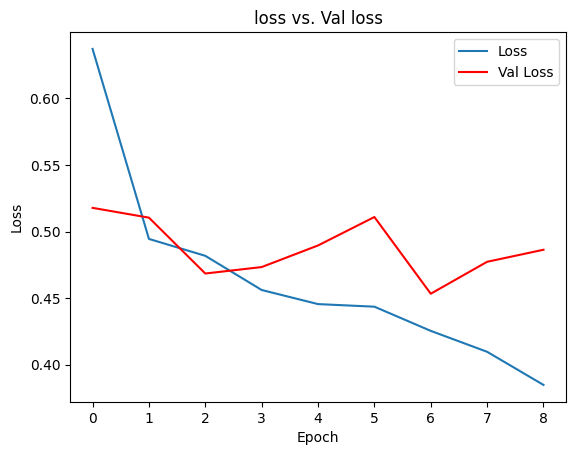

In [14]:
#accuracy 
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title('Accuracy vs. Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.gca().legend(('Accuracy','Val Accuracy')) # is the legend correct?
plt.savefig('Accuracy_plot.png')  
plt.show()


#loss
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('loss vs. Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.gca().legend(('Loss','Val Loss'))
plt.savefig('Loss_plot.png')  # photos didn't save right lol why
plt.show()


##### Step 3: Check the accuracy of the model

In [15]:
from locale import normalize
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import keras
import cv2

In [16]:
TEST_DIR =  "C:\Build\SnakeImages\\test"

test_datagen = image.ImageDataGenerator( rescale= 1. / 255)
test_data = test_datagen.flow_from_directory(directory=TEST_DIR , target_size=(224,224) , batch_size=32 , class_mode='binary')

Found 200 images belonging to 3 classes.


In [17]:
# lets print the classes :

print("test_data.class_indices: ", test_data.class_indices)

test_data.class_indices:  {'NoSnake': 0, 'Snake': 1, 'test': 2}


In [18]:
#load the saved model :

model = load_model('C:\Build\SnakeImages\MyBestModel.h5')

#print(model.summary() )

acc = model.evaluate(x=test_data)[1]

print(acc)

7/7 [==============================] - 40s 5s/step - loss: 0.4398 - accuracy: 0.8050
0.8050000071525574


In [26]:
# load an image from the test folder 
imagePath = r'C:\Build\SnakeImages\test\Snake\image43_1.png'  

img = image.load_img(imagePath,target_size=(224,224))
i = image.img_to_array(img) # convert to array
i = i / 255 # -> normalize to our model
print(i.shape)

input_arr = np.array([i]) 
print(input_arr.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [27]:
# run the prediction
predictions = model.predict(input_arr)[0][0]
print(predictions)

1/1 [==============================] - 0s 417ms/step
0.93102574


In [28]:
# since it is binary if the result is close to 0 there is a snake , and if it close to 1 there is no snake
result = round(predictions)
if result == 0 :
    text = 'Has a snake'
else :
    text = "No snake"


print(text)

No snake


In [29]:
imgResult = cv2.imread(imagePath)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(imgResult, text, (0,20), font, 0.8 , (255,0,0),2 )
cv2.imshow('img', imgResult)
cv2.waitKey(0)
cv2.imwrite("C:\Build\SnakeImages\predictImage.jpg",imgResult) # rename each time

True